## Zhumakhan Arman

### SDSC2001 Python for Data Science

### Short summary
- The goal of the project is a fraud detection in credit card transactions
- The dataset of 284,807 transactions is used. The dataset is highly unbalanced with only 0.172% fraud data
- 1-part is Data Exploration, including checking distribution of values, and data visualization
- 3-part is Data Reduction using PCA, T-SNE, Spectral Embedding algorithms and data visualization on 2d plot
- 4-part is about creating Classification model using Logistic Regression, Random Forest, Ada Boost algorithms and checking the performance (confusion matrix, ROC curve)

#### Content
The dataset contains transactions made by credit cards in September 2013 by european cardholders. Transactions occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (frauds) account for 0.172% of all transactions.

It contains numerical input variables V1-V28 which are the result of a Principal Component Analysis (PCA) transformation, as original features are not provided due to confidentiality issues. Features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' denotes the transaction Amount. 'Class' is the response variable (labelled outcome) and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('creditcard_train.csv')

df_test = pd.read_csv('creditcard_test.csv')

### Data Exploration

## `Class` is a target feature
### 0 - Non-fraud transaction
### 1 - Fraud transaction

In [4]:
df_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Training data has 284,657 rows

In [5]:
df_train.shape

(284657, 31)

### Test data has 150 rows

In [6]:
df_test.shape

(150, 31)

## Standard deviation of features V1-V28 are between 2 and 0.33, while mean is around 0. Normalization or standardization isn't necessary for these features

In [7]:
df_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,...,284657.000000,284379.000000,284137.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000
mean,94820.043168,0.000942,-0.000761,0.001280,-0.000844,0.000591,0.000233,0.000956,-0.000145,0.000553,...,-0.000075,-0.000035,0.000011,0.000045,-0.000016,0.000008,-0.000056,-0.000008,88.340966,0.001553
std,47486.331846,1.955946,1.649907,1.510265,1.413999,1.378060,1.332089,1.230796,1.192554,1.097575,...,0.733731,0.725929,0.625052,0.605657,0.521244,0.482238,0.403245,0.330077,250.129519,0.039374
min,0.000000,-56.407510,-72.715728,-48.325590,-5.683171,-113.743300,-26.160506,-43.557240,-73.216718,-13.434070,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565680,-15.430080,0.000000,0.000000
25%,54208.000000,-0.920083,-0.598696,-0.889759,-0.848833,-0.691445,-0.768153,-0.553921,-0.208633,-0.642783,...,-0.228421,-0.542878,-0.162192,-0.354543,-0.317147,-0.326978,-0.070844,-0.052954,5.600000,0.000000
50%,84704.000000,0.018393,0.065213,0.179930,-0.020146,-0.054336,-0.274058,0.040115,0.022323,-0.051198,...,-0.029518,0.007694,-0.011614,0.041012,0.016532,-0.052152,0.001326,0.011233,22.000000,0.000000
75%,139324.000000,1.315753,0.803360,1.027294,0.742826,0.611926,0.398611,0.570420,0.327241,0.597343,...,0.186287,0.529204,0.148051,0.439603,0.350702,0.240932,0.091001,0.078243,77.150000,0.000000
max,172792.000000,2.454930,22.057730,9.382558,16.875340,34.801666,73.301630,120.589500,20.007208,15.594990,...,27.202839,10.503090,22.528410,4.584549,7.519589,3.517346,31.612200,33.847808,25691.160000,1.000000


### Fraud cases make only 0.156% (442 rows) of all training data. Most of the data is non-fraud cases. This shows that dataset is highly unbalanced.

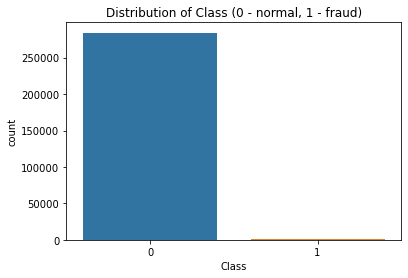

In [8]:
sns.countplot(data=df_train, x='Class')
plt.title("Distribution of Class (0 - normal, 1 - fraud)");

In [9]:
df_train['Class'].value_counts()

0    284215
1       442
Name: Class, dtype: int64

In [10]:
all_rows = df_train.shape[0]
fraud_rows = (df_train['Class'] == 1).sum()
 
print("Percentage of fraud rows: ", fraud_rows / all_rows * 100)

Percentage of fraud rows:  0.15527459363374166


### Distribution of Time

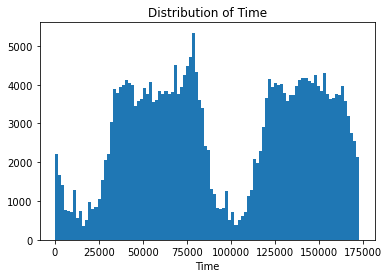

In [11]:
plt.hist(df_train['Time'], bins=100)
plt.title('Distribution of Time')
plt.xlabel('Time');

### Distribution of Amount 
#### Amount is positively skewed

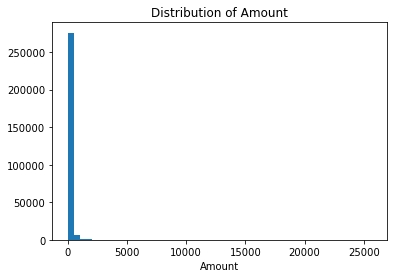

In [12]:
plt.hist(df_train['Amount'], bins=50)
plt.title('Distribution of Amount')
plt.xlabel('Amount');

In [13]:
V_features = ['V{}'.format(i) for i in range(1,29)]

## Missing values

### There are missing values in V22 and V23. And they make 0.28% of all data

In [14]:
df_train.isna().sum()

Time        0
V1          0
V2          0
V3          0
V4          0
V5          0
V6          0
V7          0
V8          0
V9          0
V10         0
V11         0
V12         0
V13         0
V14         0
V15         0
V16         0
V17         0
V18         0
V19         0
V20         0
V21         0
V22       278
V23       520
V24         0
V25         0
V26         0
V27         0
V28         0
Amount      0
Class       0
dtype: int64

In [15]:
(520 + 278) / df_train.shape[0] * 100

0.2803373885061671

### There is no correlated features with V22 and V23, so that, we cannot do imputation

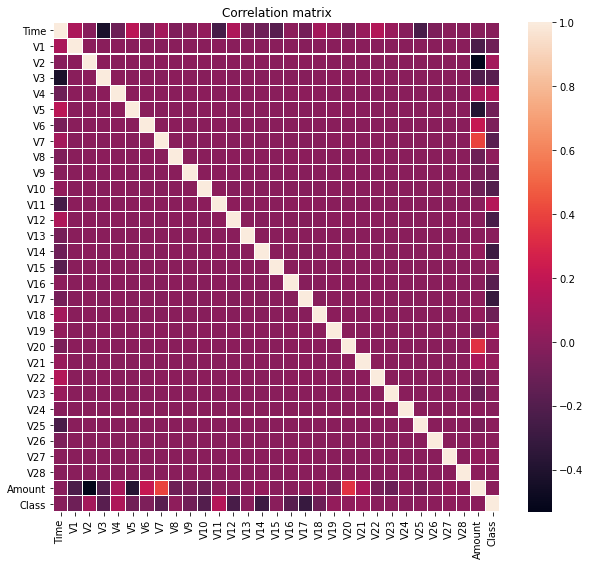

In [16]:
plt.figure(figsize=(10, 9))
sns.heatmap(df_train.corr(), linewidth=0.05)
plt.title("Correlation matrix");

### There is no fraud cases in rows that contain missing values. It means if I drop them I don't lose any valueable information, which is fraud case

In [17]:
# Number of fraud cases in rows that V22 value is missing
(df_train.loc[df_train['V23'].isna(), 'Class'] == 1).sum()

0

In [18]:
# Number of fraud cases in rows that V23 value is missing
(df_train.loc[df_train['V22'].isna(), 'Class'] == 1).sum()

0

## Removed Missing Values

In [19]:
df_train = df_train.dropna()

## Dealing with Outliers

### IQR test

### Outliers of IQR test make 21% of data.

In [20]:
q25 = df_train[V_features].quantile(q=0.25)
q75 = df_train[V_features].quantile(q=0.75)
IQR = q75 - q25

df_train['Outlier'] = ((df_train[V_features] < (q25 - 2.5 * IQR)) | 
                                (df_train[V_features] > (q75 + 2.5 * IQR))).sum(axis=1) > 0

In [21]:
(df_train['Outlier'] == True).sum() / df_train.shape[0]

0.21376810317798625

### The number of fraud cases

In [22]:
fraud = df_train[df_train['Class'] == 1]
normal = df_train[df_train['Class'] == 0]
fraud.shape[0]

442

### The number of outliers in fraud data

In [23]:
fraud['Outlier'].sum()

406

### If I delete outliers, I lose 92% of fraud data, which is rare in the given dataset. It shows outliers capture important information about fraud. So, we keep all outliers

In [24]:
print(406 / 442 * 100)

91.8552036199095


In [25]:
# Outlier is not necessary any more. So, I drop it
df_train = df_train.drop('Outlier', axis=1)

### Module 2: Data Visualization
What are the distributions of variables? Are the variables distributed differently in the Fraud group and in the Normal group? Use tables and/or figures to visualize your exploration and findings. Present no more than 5 figures/tables that you think are important, and you may state in your findings that other variables a, b, c have similar patterns.

### Mean values of many features in fraud cases are considerably dfiferent than normal cases. it shows different distributions. Some of them are visualized as example

In [26]:
pd.DataFrame([fraud.mean(), normal.mean()], index=['Fraud (mean)', 'Normal (mean)']).T

,Fraud (mean),Normal (mean)
Time,81877.730769,94869.497137
V1,-4.739654,0.007224
V2,3.599867,-0.006540
V3,-6.968586,0.011709
V4,4.497262,-0.008042
V5,-3.100015,0.005822
V6,-1.398321,0.002501
V7,-5.526510,0.009705
V8,0.561622,-0.001201
V9,-2.551473,0.004451


### Visualization of features with different distribution in fraud and normal cases

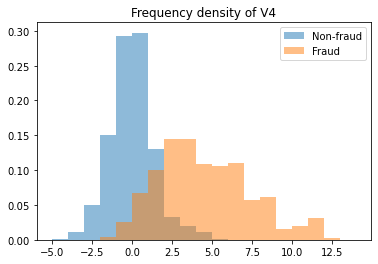

In [27]:
plt.hist(df_train.loc[df_train['Class']==0, 'V4'], bins=range(-5, 15),density=True, alpha=0.5, label='Non-fraud')
plt.hist(df_train.loc[df_train['Class']==1, 'V4'], bins=range(-5, 15),density=True, alpha=0.5, label='Fraud')
plt.legend()
plt.title("Frequency density of V4");

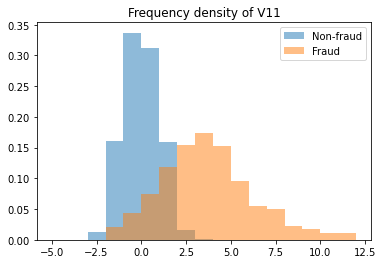

In [28]:
plt.hist(df_train.loc[df_train['Class']==0, 'V11'], bins=range(-5, 13),density=True, alpha=0.5, label='Non-fraud')
plt.hist(df_train.loc[df_train['Class']==1, 'V11'], bins=range(-5, 13),density=True, alpha=0.5, label='Fraud')
plt.legend()
plt.title("Frequency density of V11");

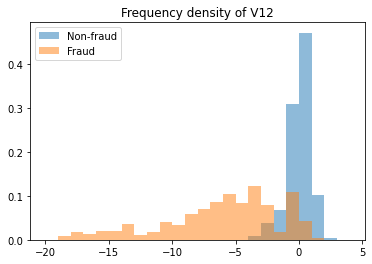

In [29]:
plt.hist(df_train.loc[df_train['Class']==0, 'V12'], bins=range(-20, 5),density=True, alpha=0.5, label='Non-fraud')
plt.hist(df_train.loc[df_train['Class']==1, 'V12'], bins=range(-20, 5),density=True, alpha=0.5, label='Fraud')
plt.legend()
plt.title("Frequency density of V12");

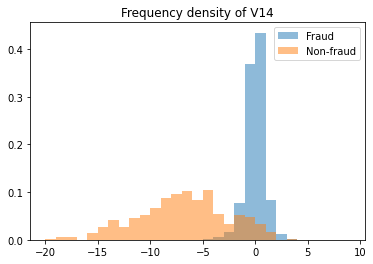

In [30]:
plt.hist(df_train.loc[df_train['Class']==0, 'V14'], bins=range(-20, 10),density=True, alpha=0.5, label='Non-fraud')
plt.hist(df_train.loc[df_train['Class']==1, 'V14'], bins=range(-20, 10),density=True, alpha=0.5, label='Fraud')
plt.legend()
plt.title("Frequency density of V14");

### Most of features' distribution is close to normal distribution (Gaussian).  Especially, distribution of fraud data is like normal distribution

### Variables V4, V10, V11, V12, V14, V16, V17 are distributed differently in fraud and normal data

-----

### Module 3: Dimension Reduction
Apply unsupervised learning methods to achieve dimension reduction. Visualize and interpret the results. Any dimension reduction algorithms can be used.

### Standardization

Values of Time and Amout varies a lot comparing to other features. Due to Time and Amount's large variance, dimention reduction algorithms will capture mostly Time and Amount. Therefore, I need to scale them

#### When training data is scaled, test data should be scaled too

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
df_train['Amount_scaled'] = scaler.fit_transform(df_train[['Amount']])
df_test['Amount_scaled'] = scaler.transform(df_test[['Amount']])

In [33]:
df_train['Time_scaled'] = scaler.fit_transform(df_train[['Time']])
df_test['Time_scaled'] = scaler.transform(df_test[['Time']])

In [34]:
df_train = df_train.drop(['Amount', 'Time'], axis=1)
df_test = df_test.drop(['Amount', 'Time'], axis=1)

In [35]:
X = df_train.drop(['Class'], axis=1)
y = df_train['Class']

### Under-sampling

In classification part (module 4), I will use under-sampling. In order to test how the same data can be classified using dimention reduction algorithms, I implement under-sampling in this part (module 3).

In under-sampling, I create a new dataframe with the same number of fraud and non-fraud cases. The number of fraud cases is 442, so I take 442 rows of non-fraud data.

In [36]:
# shuffling data
shuffled_df_train = df_train.sample(frac=1, random_state=1)

fraud_df = shuffled_df_train.loc[df_train['Class'] == 1]
normal_df = shuffled_df_train.loc[df_train['Class'] == 0][:442]

new_df_train = pd.concat([fraud_df, normal_df]).sample(frac=1, random_state=2)

In [37]:
new_df_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled,Time_scaled
40494,1.159373,2.844795,-4.050680,4.777701,2.948980,-2.010361,1.744086,-0.410287,-2.450198,-2.042168,...,-0.433470,-0.529323,-0.597020,1.335954,0.547092,0.009979,0.160769,1,-0.349118,-1.149262
42907,-13.680760,6.990389,-13.770001,8.694897,-11.426968,-2.919845,-14.594562,8.622905,-8.090697,-12.780634,...,0.497599,-0.509290,0.732503,0.280528,0.280037,-1.406687,-0.663643,1,-0.350077,-1.127529
50352,-0.343595,1.035378,0.381325,0.753110,-0.010659,-0.061422,0.393586,0.439276,-0.921654,-0.235532,...,0.399977,-0.046590,-0.353342,-0.055287,-0.304016,-0.064456,-0.032168,0,-0.135395,-1.060898
200982,1.176633,3.141918,-6.140445,5.521821,1.768515,-1.727186,-0.932429,0.292797,-3.156827,-3.898240,...,-0.803021,-0.074098,-0.031084,0.375366,0.065897,0.488258,0.325872,1,-0.353112,0.818813
42920,-13.897206,6.344280,-14.281666,5.581009,-12.887133,-3.146176,-15.450467,9.060281,-5.486121,-14.676470,...,0.941180,-0.232710,0.763508,0.075456,-0.453840,-1.508968,-0.686836,1,-0.313218,-1.127423


In [38]:
new_df_train.shape

(884, 31)

In [39]:
X_train = new_df_train.drop('Class', axis=1)
y_train = new_df_train['Class']

### PCA ( Principal component analysis )

In [40]:
from sklearn.decomposition import PCA

In [41]:
X_pca = PCA(n_components=2, random_state=1).fit_transform(X_train)

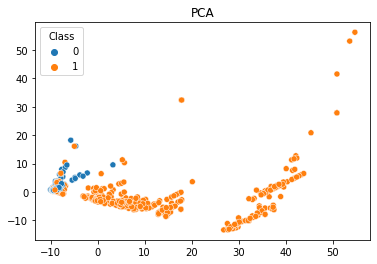

In [42]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_train)
plt.title('PCA');

### TSNE ( t-distributed Stochastic Neighbor Embedding)

### t-SNE is recommended in sklearn documentation 
"For visualization purpose (which is the main use case of t-SNE), using the Barnes-Hut method is strongly recommended". [link](https://scikit-learn.org/stable/modules/manifold.html)

In [43]:
from sklearn.manifold import TSNE

In [44]:
tsne = TSNE(n_components=2, perplexity=35, random_state=1)
X_tsne = tsne.fit_transform(X_train)

### Clusters in t-SNE are clearly separeted

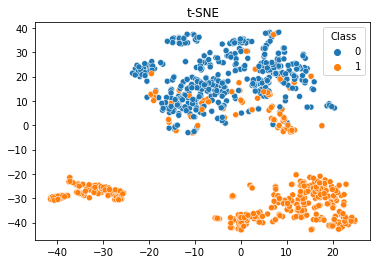

In [45]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_train)
plt.title('t-SNE');

### Spectral Embedding

In [46]:
from sklearn.manifold import SpectralEmbedding

In [47]:
mds = SpectralEmbedding(n_components=2, gamma=10)
X_se = mds.fit_transform(X_train)

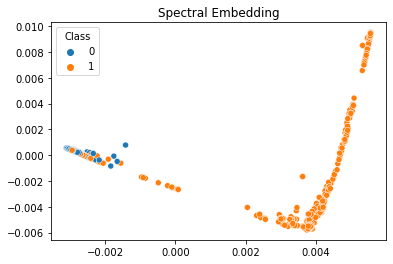

In [48]:
sns.scatterplot(x=X_se[:,0], y=X_se[:,1], hue=y_train)
plt.title('Spectral Embedding');

### As shown in plots using dimension reduction methods, fraud and non-fraud cases are clustered separetely. It means the data has good signal for classification and models will be able to detect easily. 

------

### Module 4: Classification
Choose three classification methods and build classification models, using 5-fold cross-validation. <br>

Further, load `creditcard_test.csv` and use it as the test dataset to evaluate your models and compare their performance. Consider visualizing the results, and evaluate the results using metrics such as the overall accuracy and the confusion matrix. <br>

Hint: because the dataset is highly unbalanced, consider undersampling, i.e. randomly select N normal observations of the same size as the N fraud observations, and use N+N=2N samples for model fitting and training. 

In [49]:
###pick 3 classification methods, and methods not in the below list can also be used; you can also pick more than three methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

In [50]:
X_test = df_test.drop('Class', axis=1)
y_test = df_test['Class']

### Undersampling the imbalanced data

In [51]:
# shuffling data
df_train = df_train.sample(frac=1, random_state=1)

# take fraud data
fraud_df = df_train.loc[df_train['Class'] == 1]
# select the same number of normal data
normal_df = df_train.loc[df_train['Class'] == 0][:442]

new_df_train = pd.concat([fraud_df, normal_df]).sample(frac=1, random_state=2)

X_train = new_df_train.drop('Class', axis=1)
y_train = new_df_train['Class']

In [52]:
y_train.value_counts()

1    442
0    442
Name: Class, dtype: int64

### Logistic Regression

hyperparameter tuning with Grid Search CV. 

In [53]:
log_reg_params = {'C': [1, 3, 10, 100]}
log_res = LogisticRegression(max_iter=1000)
grid_log_reg = GridSearchCV(log_res, log_reg_params, cv=5)
grid_log_reg.fit(X_train, y_train);

#### Best score in CV

In [54]:
grid_log_reg.best_score_

0.9411530559835644

In [55]:
y_logreg = grid_log_reg.predict(X_test)

#### Accuracy of the model on test set

In [56]:
accuracy_score(y_test, y_logreg)

0.9733333333333334

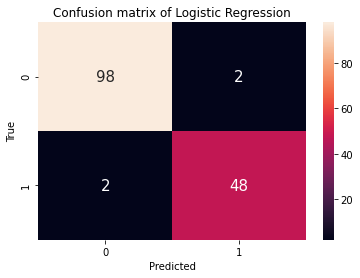

In [57]:
sns.heatmap(confusion_matrix(y_test, y_logreg), annot=True, annot_kws={'fontsize':15})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix of Logistic Regression');

In [58]:
print(classification_report(y_test, y_logreg))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



### SVC ( Support Vector Classification)

In [59]:
svc_params = {'C': [0.1, 0.5, 1, 5, 10], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

svc = SVC()
grid_svc = GridSearchCV(svc, svc_params, cv=5)
grid_svc.fit(X_train, y_train);

In [60]:
grid_svc.best_score_

0.9400166923472009

In [61]:
y_svc = grid_svc.predict(X_test)

#### Accuracy of SVC on test set

In [62]:
accuracy_score(y_test, y_svc)

0.9666666666666667

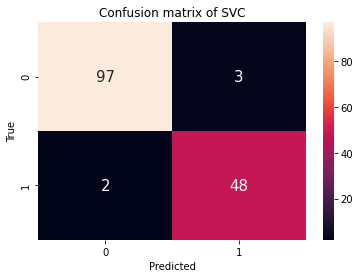

In [63]:
sns.heatmap(confusion_matrix(y_test, y_svc), annot=True, annot_kws={'fontsize':15})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix of SVC');

In [64]:
print(classification_report(y_test, y_svc))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       100
           1       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.97      0.97      0.97       150



### Random Forest Classifier

In [65]:
rf_params = {'n_estimators': [100, 300, 500], 
             'max_depth': [5,7,9], 
             'max_features': ['auto', 'sqrt'], 
             'min_samples_leaf': [1, 2, 4]}

rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, rf_params, cv=5)
grid_rf.fit(X_train, y_train);

In [66]:
grid_rf.best_score_

0.9411594761171033

In [67]:
grid_rf.best_params_

{'max_depth': 7,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [68]:
y_rf = grid_rf.predict(X_test)

#### Accuracy of Random Forest model on test set

In [69]:
accuracy_score(y_test, y_rf)

0.96

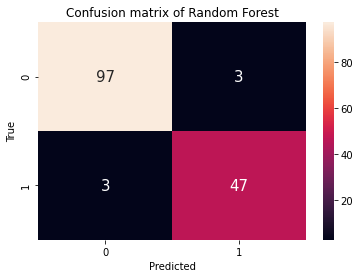

In [70]:
sns.heatmap(confusion_matrix(y_test, y_rf), annot=True, annot_kws={'fontsize':15})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix of Random Forest');

In [71]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       100
           1       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.96      0.96      0.96       150



### Ada Boost Classifier

In [72]:
ada_params = {'n_estimators': [100, 300, 500]}

ada = AdaBoostClassifier()
grid_ada = GridSearchCV(ada, ada_params, cv=5)
grid_ada.fit(X_train, y_train);

In [73]:
grid_ada.best_score_

0.9422894196199281

In [74]:
y_ada = grid_ada.predict(X_test)

#### Accuracy of Ada Boost Classifier model on test set

In [75]:
accuracy_score(y_test, y_ada)

0.9666666666666667

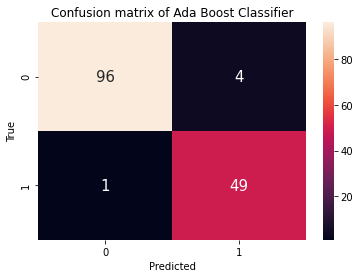

In [76]:
sns.heatmap(confusion_matrix(y_test, y_ada), annot=True, annot_kws={'fontsize':15})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix of Ada Boost Classifier');

In [77]:
print(classification_report(y_test, y_ada))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       100
           1       0.92      0.98      0.95        50

    accuracy                           0.97       150
   macro avg       0.96      0.97      0.96       150
weighted avg       0.97      0.97      0.97       150



### ROC curve and AUC score

### AUC score of all models are close to 1

In [78]:
y_log_score = grid_log_reg.decision_function(X_test)
y_svc_score = grid_svc.decision_function(X_test)
y_ada_score = grid_ada.decision_function(X_test)

print("AUC scores")
print("Logistic Regression: {:.3f}".format(roc_auc_score(y_test, y_log_score)))
print("SVC: {:.3f}".format(roc_auc_score(y_test, y_svc_score)))
print("Ada Boost Classfier: {:.3f}".format(roc_auc_score(y_test, y_ada_score)))

AUC scores
Logistic Regression: 0.986
SVC: 0.989
Ada Boost Classfier: 0.991


### Logistic Regression showed the best result on accuracy. Let's look at deeper

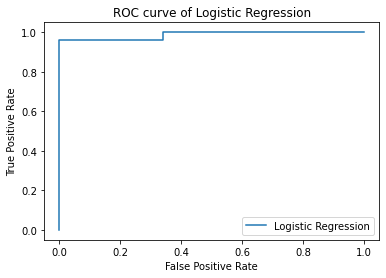

In [79]:
plot_roc_curve(grid_log_reg, X_test, y_test, label='Logistic Regression')
plt.title("ROC curve of Logistic Regression");

### As we see on graph above, ROC curve captures almost all space

## Check Logistic Regression on all training data without under-sampling

In [80]:
X_all = df_train.drop('Class', axis=1)
y_all = df_train['Class']

In [81]:
X_all.shape

(283859, 30)

In [82]:
pred_all = grid_log_reg.predict(X_all)

### Accuracy of the model on all training data

In [83]:
print("Accuracy on all training data: {:.3f}".format(accuracy_score(y_all, pred_all)))

Accuracy on all training data: 0.967


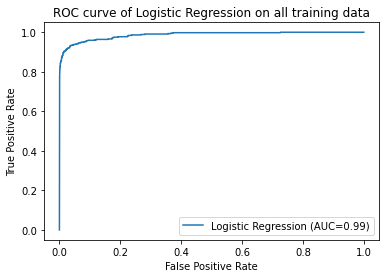

In [84]:
plot_roc_curve(grid_log_reg, X_all, y_all, label='Logistic Regression (AUC=0.99)')
plt.title("ROC curve of Logistic Regression on all training data");

### The model misclassified many normal transactions as fraud transaction

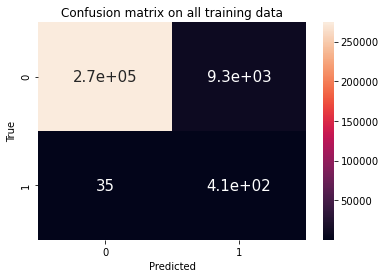

In [85]:
sns.heatmap(confusion_matrix(y_all, pred_all), annot=True, annot_kws={'fontsize':15})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix on all training data');

### Module 5: Summary
Summarize your findings and draw conclusions.

#### My findings:

1. The given training data is imbalanced. Fraud transactions make only 0.16% of all data. Undersampling helped to fix this issue
2. I removed rows that have missing values because none of them are fraud cases. So, I don't lose valueable information by dropping them.
3. Distribution of some features such as V4, V11, V12, V14, V17, is different in fraud cases than the normal cases. 
4. Fraud transactions contain outliers because they are different the normal transactions. Therefore, I didn't delete outliers. By deleting outliers, we lose most of fraud data.
5. Dimension reduction algorithms like PCA, t-SNE showed that with the only 2 components on visualization we can notice the difference of fraud transactions. It's evidence that ML algorithms perform well.
6. All models have good accuracy score on test set with above 95%. The result:
 - Logistic Regression - 97.3%
 - SVC - 96.7%
 - Random Forest - 96%
 - Ada Boost Classifier - 96.7%
7. Logistic Regression showed the best results. its result:
 - precision - 96%
 - recall - 96%

#### Conclusion
Undersampling helped to deal with imbalance data. Logistic Regression showed the best result with accuracy 97% on test data, 96% on all training data. These models are deployable in real life. Although it has very high accuracy, it misclassified many normal transactions as fraud transaction. In the credit card fraud detection task, detecting fraud transaction is more important than detecting normal data. Because we can check normal transactions by contacting owners of credit cards. If we miss the fraud transaction, it will be impossible to fix it later.

On the other hand, calling to credit card owners every time, when they make regular daily transactions, causes customer complaints and dissatisfaction. Also, banks would spend a lot of money on employees. So, we deal with it by increasing the accuracy of models to predict more data right. One possible way is to collect more fraud data and train models again. The given training data has only 442 fraud transaction, which is 0.156% of all data. If we increase the number of fraud transaction in the data, it could lead to even more accuracy. Another possible approch might be using over-sampling instead of under-sampling. In over-sampling we get more data to train models. I didn't use it as under-sampling technique is suggested to use in project. 
